<a href="https://colab.research.google.com/github/pushpam-raghuvanshi/airbnb-bookings-analysis/blob/main/Capstone_Project_Pushpam_Raghuvanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Airbnb Exploratory Data Anlysis Capstone Project | AlmaBetter**

---
#### 1. What types of accommodation/room types are offered?
#### 2. How many properties are in different neighbourhoods and what proportion of accommodations/room type are available?
#### 3. Who are the top 10 hosts and their property name and in which neighbourhood?(Top 10 hosts with maximum number of properties listed)

#### 4. What kind of accommodation are offered by the top 10 hosts?

#### 5. What is the average price for room types in the various neighborhood groups?

## Mounting the drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing all necessary libraries

In [6]:
# Importing Libraries for the analysis of Airbnb data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Airbnb Dataset

In [7]:
# Using pandas library and read_csv function importing the dataset(here .csv file) from Google drive
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Airbnb Bookings Analysis - Pushpam Raghuvanshi/Dataset - Airbnb NYC 2019.csv'
airbnb = pd.read_csv(file_path)

## Reading the data

In [8]:
# Overviewing of data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# Using the shape attribute to check the number of rows and columns in the data. (rows, columns)
airbnb.shape

(48895, 16)

In [10]:
# Using the columns attribute to identify the different columns of the data.
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Summary of Dataset using the info() funtion.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data Cleaning

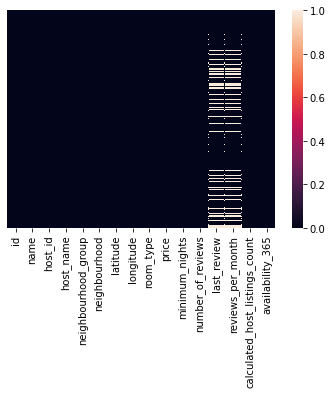

In [12]:
# Using Heat map datavisualization of null values
sns.heatmap(airbnb.isnull(),yticklabels=False)

In [13]:
 # Checking for null values and sum for each columns
 airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### As the summary shows, this Airbnb data set is massive with 48895 row entries and 16 columns.  In addition, different columns have different dataytypes. Also, there are significant NaN values in some columns and some columns are not significant for more in-depth analysis so dropping them.

In [14]:
# Filling null value entries of reviews_per_month column with zero
airbnb['reviews_per_month'].fillna('0', inplace=True)

In [15]:
# Dropping columns that are not significant for further analysis
airbnb.drop(['id', 'last_review', 'latitude', 'longitude'],axis=1, inplace =True)

In [16]:
# Examine dataset after dropping above mentioned columns
airbnb.head().T

,0,1,2,3,4
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,0,4.64,0.1


In [17]:
# After dropping some coluumns
list(airbnb.columns)

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [18]:
# Using describe function checking for satistical summary of numerical columns
airbnb.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,67620010.65,78610967.03,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
price,48895.0,152.72,240.15,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.03,20.51,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.27,44.55,0.0,1.0,5.0,24.0,629.0
calculated_host_listings_count,48895.0,7.14,32.95,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,112.78,131.62,0.0,0.0,45.0,227.0,365.0


In [19]:
# Using describe function checking for satistical summary of columns object.
airbnb.describe(include = 'object').fillna('-').round(2).T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
reviews_per_month,48895,938,0,10052


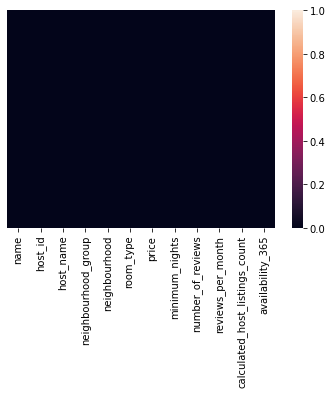

In [20]:
# Using Heat map datavisualization of null value after removing some columns and filling null values
sns.heatmap(airbnb.isnull(),yticklabels=False)

## Data Analysis and Visualization

### Number of Accommodations/Rooms Types Listed.

In [21]:
# Assigning a variable for counting different accommodations types
accommodations_types = airbnb['room_type'].value_counts()
accommodations_types

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 0, 'Accommodations Types')

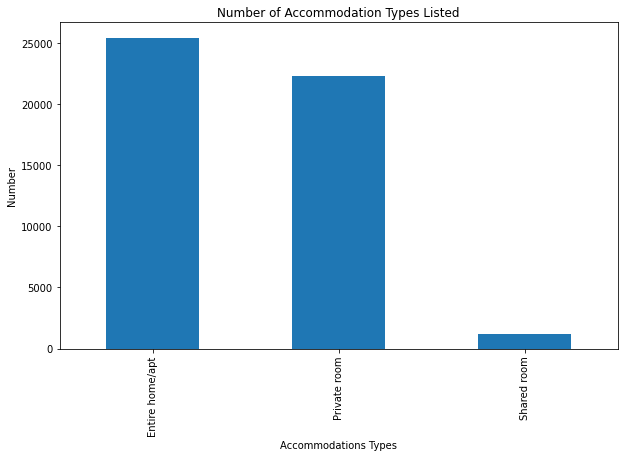

In [22]:
# Plotting a bar chart to show Number of Accommodation Types Listed
plt.rcParams['figure.figsize'] = (10, 6)
accommodations_types.plot(kind='bar')
plt.title('Number of Accommodation Types Listed')
plt.ylabel('Number')
plt.xlabel('Accommodations Types')

### From the Plot we clearly see that Entire home/apartment and Private rooms are much more significant than Shared rooms. There can be plenty of reasons like more people prefer privacy, hygiene, space.

### Proportion of Properties in Different Neighbourhoods.

In [23]:
# Assigning a variable to count properties in different neighbourhood
propteries_in_neighbourhoods = airbnb.groupby(['neighbourhood_group'])['host_name'].count()
propteries_in_neighbourhoods

neighbourhood_group
Bronx             1090
Brooklyn         20095
Manhattan        21652
Queens            5664
Staten Island      373
Name: host_name, dtype: int64

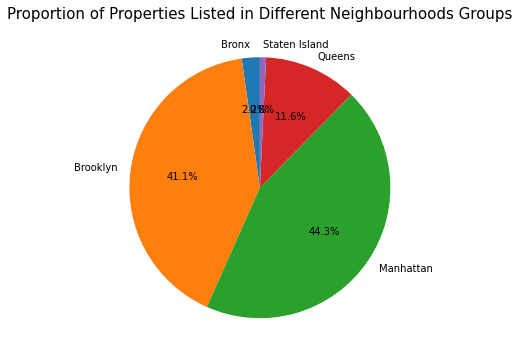

In [24]:
# Plotting a Pie Chart to show the Proportion of properties listed in different neighboourhood groups
mylabels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.rcParams['figure.figsize'] = (30, 6)
plt.pie(propteries_in_neighbourhoods, labels = mylabels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Properties Listed in Different Neighbourhoods Groups', fontsize=15)
plt.show()

### It is clear from the above Pie Chart that MANHATTAN is the city with the highest number of listed properties.  On the other hand, Staten Island has a minimal number of registered properties.

In [25]:
# Making a database to keep the number of hosts in different neighborhoods under neighborhood groups.
df = airbnb.groupby(['neighbourhood_group','neighbourhood'])['host_name'].count().reset_index().rename(columns={'neighbourhood_group':'Neighbourhood Group','neighbourhood':'Neighbourhood', 'host_name':'Number of Hosts'})
df

,Neighbourhood Group,Neighbourhood,Number of Hosts
0,Bronx,Allerton,42
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
216,Staten Island,Tottenville,7
217,Staten Island,West Brighton,18
218,Staten Island,Westerleigh,2
219,Staten Island,Willowbrook,1


### Top 10 Hosts by Number of Properties Registered.

In [26]:
# Using the unique() function to create a list of unique hostnames within the ['host_name'] column.
list(airbnb['host_name'].unique())

['John',
 'Jennifer',
 'Elisabeth',
 'LisaRoxanne',
 'Laura',
 'Chris',
 'Garon',
 'Shunichi',
 'MaryEllen',
 'Ben',
 'Lena',
 'Kate',
 'Laurie',
 'Claudio',
 'Alina',
 'Allen & Irina',
 'Jane',
 'Doti',
 'Adam And Charity',
 'Sing',
 'Chaya',
 'Lisel',
 'Nathalie',
 'Gregory',
 'Claude & Sophie',
 'Tommi',
 'Shon',
 'Dana',
 'Ssameer Or Trip',
 'Teri',
 'Andrea',
 'Angela',
 'Vt',
 'Tyrome',
 'Harriet',
 'Edward',
 'Abdul',
 'Yolande',
 'Cyn',
 'Earl',
 'Rana',
 'Orestes',
 'Adreinne',
 'Alexander',
 'JT And Tiziana',
 'Joya',
 'James',
 'Jeanne',
 'Francesca',
 'Joanna',
 'Bianca',
 'Luiz',
 'Ted',
 'Cristina',
 'Petra',
 'D',
 'Dimitri',
 'Patricia',
 'Mark',
 'Sara',
 'Reka',
 'Daniel',
 'Casey',
 'Robin',
 'Anna',
 'Enzo',
 'Tye And Etienne',
 'George',
 'Josh',
 'Victoria',
 'Justin',
 'Blaise',
 'DAVID And RICK',
 'Lulú',
 'Sybilla',
 'JoLynn',
 'Gaia',
 'Ana',
 'Maggie',
 'Starlee',
 'Pas',
 'Augustin',
 'Sean & Lynette',
 'Erica',
 'Tracy',
 'Christiana',
 'Elliott',
 'Olan',


In [27]:
# Using the nunique() function for counting the number of unique hostnames in the ['host_name'] column.
airbnb['host_name'].nunique()

11452

### There are about 11000 hosts in all neighbourhood.

In [28]:
# Creating a variable for storing the Top 10 hostnames by number of Properties Listed.
top_10_hosts = airbnb.groupby(['host_id'])['host_name'].value_counts().sort_values(ascending=False).head(10)
print(top_10_hosts)
print('\n')
type(top_10_hosts)

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
16098958   Jeremy & Laura        96
12243051   Sonder                96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
1475015    Mike                  52
Name: host_name, dtype: int64




pandas.core.series.Series

In [29]:
# Creating a dataframe for Top 10 Host ID with their Name and Listing Count
top_10_hosts_df = pd.DataFrame(top_10_hosts)
top_10_hosts_df.rename(columns = {'host_name':'Listing Count'}, inplace=True)
top_10_hosts_df

,,Listing Count
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
16098958,Jeremy & Laura,96
12243051,Sonder,96
61391963,Corporate Housing,91
22541573,Ken,87
200380610,Pranjal,65


In [30]:
# Making a Plot for the same
Top_10_host = airbnb['host_id'].value_counts().head(10)
Top_10_host_df = pd.DataFrame(Top_10_host)
Top_10_host_df.reset_index(inplace=True)
Top_10_host_df.rename(columns={'index':'Host_ID', 'host_id':'Listing_Count'}, inplace=True)

In [31]:
# Setting the figure/plot size
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

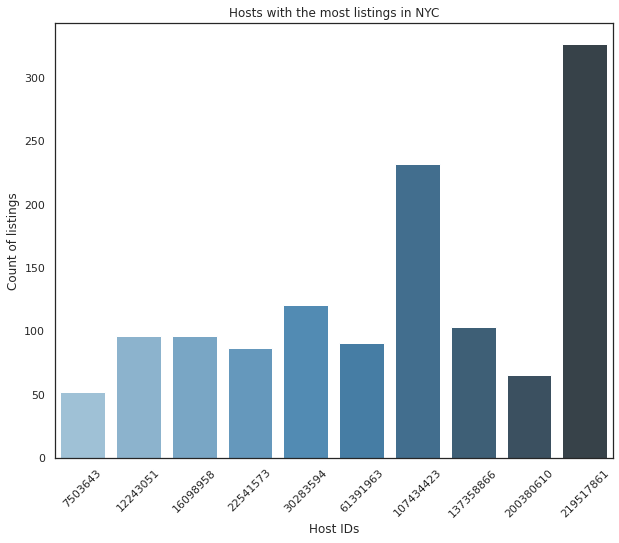

In [32]:
# Using Seaborn Library to plot the graph
viz_1=sns.barplot(x="Host_ID", y="Listing_Count", data=Top_10_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

### From the Dataframe and graph, it is evident that Host ID 219517861 with Host name as Sonder (NYC) has most around 300 listings.  Furthermore, we can see that there is a good distribution among the other Top hosts listed.

### Types of accommodation provided by Top 10 Hosts.



In [33]:
# Creating a dataframe for types of accommodation provided by top 10 hosts 
acc = airbnb.groupby(['host_name'])['room_type'].value_counts().sort_values(ascending=False).head(10).unstack()
acc

room_type,Entire home/apt,Private room
host_name,,
Sonder (NYC),319.0,NaN
Michael,251.0,152.0
Blueground,232.0,NaN
David,214.0,184.0
Alex,175.0,NaN
John,135.0,153.0
Mike,141.0,NaN


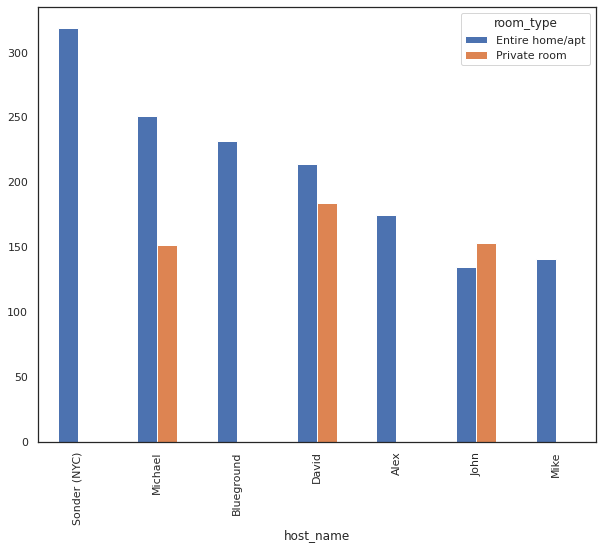

In [34]:
# Plotting a chart to show types of accommodation provided by top 10 hosts
acc.plot.bar()

### Room Type and their Average Price in Different Neighbourhood

In [35]:
# Using nunique function counting for different neighbourhood groups
airbnb['neighbourhood_group'].nunique()

5

In [36]:
# Making a list of different neighbourhood groups
list(airbnb['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [37]:
# Creating a dataframe using groupby function to count different room types in different neighbourhood groups
D = airbnb.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
D

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


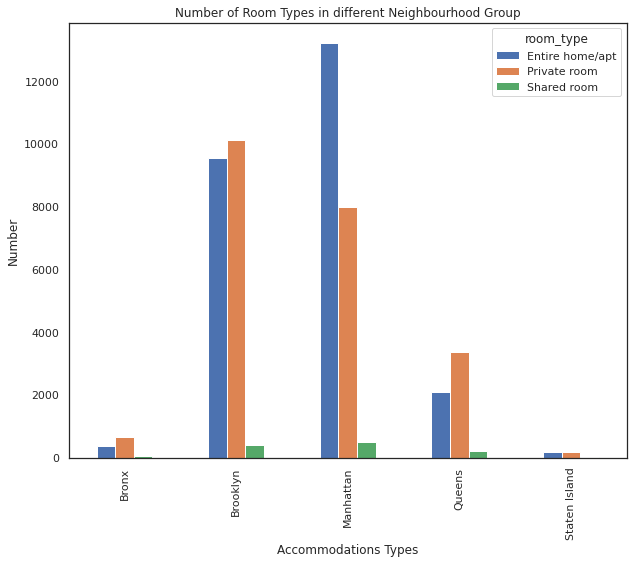

In [38]:
# Plotting a Bar graph to show number of different types in each neighbourhood group
D.plot.bar()
plt.title('Number of Room Types in different Neighbourhood Group')
plt.ylabel('Number')
plt.xlabel('Accommodations Types')
# Setting the figure size for the plot
plt.rcParams['figure.figsize'] = (10, 6)


In [39]:
# Creating a dataframe for average price of room types in different  neighbourhood groups
avg_price = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


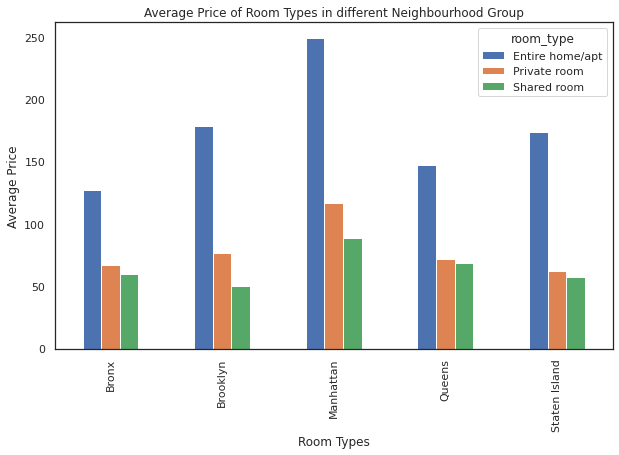

In [40]:
# Plotting a graph for the same
avg_price.plot.bar()
plt.title('Average Price of Room Types in different Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Room Types')
# Setting the figure size for the plot
plt.rcParams['figure.figsize'] = (8, 6)

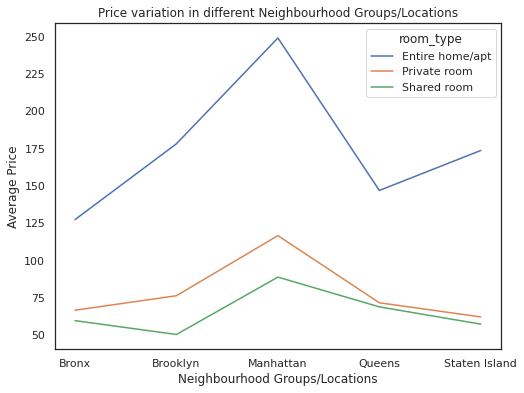

In [41]:
# Line Graph showing the variation of average price in different neighbourhood locations
avg_price.plot.line()
plt.title('Price variation in different Neighbourhood Groups/Locations')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Groups/Locations')
# Setting the figure size for the plot
plt.rcParams['figure.figsize'] = (10, 20)

### It is clear from the above line graph of price change in neighborhood groups that Manhattan is an expensive city for customers.  All types of rooms in Manhattan are much more expensive than other neighborhoods.